In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.ar_model import AutoReg

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./data/ghana_gdp.csv',
                 index_col='year', parse_dates=['year'])

display(df.head())
display(df.info())


,GDP (current US$)
year,
1960-01-01,1.217087e+09
1961-01-01,0.000000e+00
1962-01-01,1.382353e+09
1963-01-01,1.540616e+09
1964-01-01,1.731092e+09


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 62 entries, 1960-01-01 to 2021-01-01
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GDP (current US$)  62 non-null     float64
dtypes: float64(1)
memory usage: 992.0 bytes


None

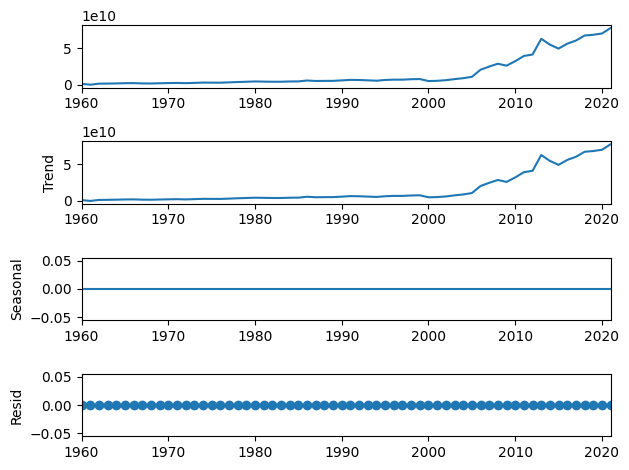

In [3]:
decompose = seasonal_decompose(df)
decompose.plot()
plt.show()

In [4]:
train_df = df.iloc[:-1]
test_df = df.iloc[-1]


In [5]:
def stationary(data, p_value=0.05):
    stats = adfuller(data)
    if stats[1] > p_value:
        print('Series is stationary')
    else:
        print('Series is not stationary')


stationary(df)


Series is stationary


In [6]:
# Exponential smoothing
ses = SimpleExpSmoothing(train_df)
alpha = 0.7
model = ses.fit(smoothing_level=alpha, optimized=False)
exp_pred = model.forecast(1)
print(exp_rmse := np.sqrt(mean_squared_error(test_df, exp_pred)))

8388933456.158112


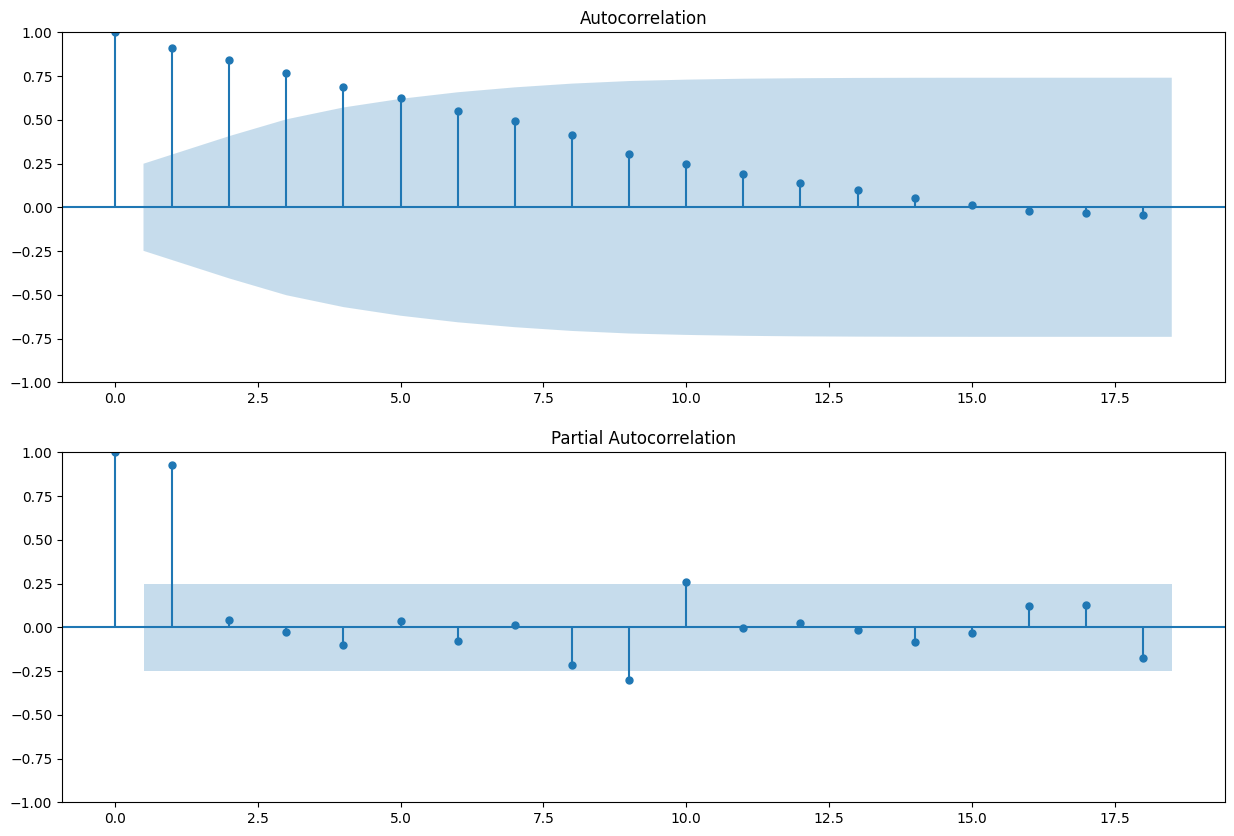

In [7]:
# Autocorrelation
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
acf_data = plot_acf(df, ax= axes[0])
pcf_data = plot_pacf(df, ax= axes[1])


In [8]:
p = 1

In [9]:
# Autoregression model
ar_model = AutoReg(train_df, lags=p).fit()
display(ar_model.summary())

ar_pred = ar_model.predict(start = len(train_df), end = len(train_df), dynamic=False)
ar_rmse = np.sqrt(mean_squared_error(test_df, ar_pred))
print(ar_rmse)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:      GDP (current US$)   No. Observations:                   61
Model:                     AutoReg(1)   Log Likelihood               -1406.183
Method:               Conditional MLE   S.D. of innovations     3648002088.289
Date:                Thu, 03 Aug 2023   AIC                           2818.366
Time:                        09:50:35   BIC                           2824.649
Sample:                    01-01-1961   HQIC                          2820.824
                         - 01-01-2020                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4.884e+08   5.83e+08      0.838      0.402   -6.53e+08    1.63e+09
GDP (current US$).L1     1.0475      0.025     42.377      0.000       0.999       1.096
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9547           +0.0000j            0.9547            0.0000
-----------------------------------------------------------------------------
"""

3737212723.3241425


In [10]:
# Conclusion
if ar_rmse > exp_rmse:
    print("The AR model is better than the exponential smoothing model.")
    print(f'Prediction: {ar_pred}')
else:
    print("The exponential smoothing model is better than the AR model.")
    print(f'Prediction: {exp_pred}')
    

The exponential smoothing model is better than the AR model.
Prediction: 2021-01-01    6.920535e+10
Freq: AS-JAN, dtype: float64
